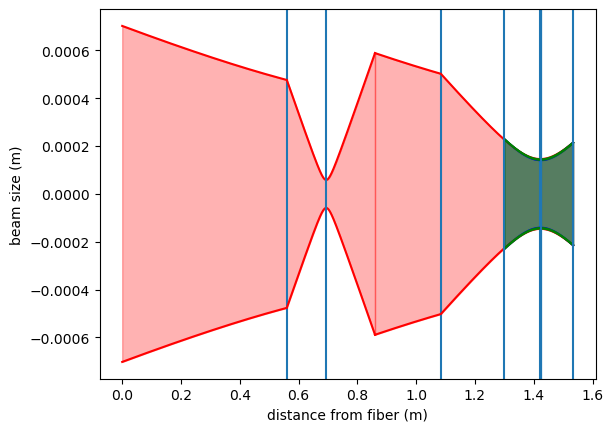

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

z_0_0 = 1.08686031e+00
w_0 = 3.81104773e-04
z_r = np.pi*w_0**2/650e-9



wl = 650e-9

# focal length of first 2 and third lens
f = 0.15
f_2 = 0.5

# curvature of mirrors
radius = 0.2

# distance to lenses
d1 = 0.56
d2 = d1+0.3
d3 = 1.0840000000000003

# distance to mirrors
d4 = 1.3
d5 = 1.534

q0 = complex(-z_0_0,z_r)
# lens 1
q1 = q0+d1
q2 = q1/(-q1/f+1)
# lens 2
q3 = q2+d2-d1
q4 = q3/(-q3/f+1)
# lens 3
q5 = q4+d3-d2
q6 = q5/(-q5/f_2+1)

# reflection at m2
q7 = q6 + d5 - d3
q8 = q7/(-2*q7/radius+1)

# reflection at m1
q9 = q8 + d5 - d4
q10 = q9/(-2*q9/radius+1)

q11 = q10 + d5 -d4
q12 = q11/(-2*q11/radius+1)


def plot(begin_func, end_func, begin_plot, end_plot, q, step,color):
    # define distance
    z_func = np.arange(begin_func, end_func, 0.0001)
    z_plot = np.arange(begin_plot, end_plot, step)
    # define laser
    w_0 = np.sqrt(q.imag*wl/np.pi)
    w = w_0*np.sqrt(1+((z_func-begin_func+q.real)**2/q.imag**2))
    plt.plot(z_plot,w,color)
    plt.plot(z_plot,-w,color)
    plt.fill_between(z_plot,w,-w,alpha=0.3,color=color)
    plt.axvline(z_plot[np.argmin(w)])
    return(z_plot[np.argmin(w)])


def optimize():
    dif = 1000
    d_opt = 0
    for d3 in np.arange(d4,d5,0.0001):
        d_2 = plot(d5+(d5-d4),d5+2*(d5-d4), d4, d5, q10, 0.0001,'g') 
        d_1 = plot(d5, d5+(d5-d4), d5, d4, q8, -0.0001,'b')
        if abs(d_2-d_1) < dif:
            dif = abs(d_2-d_1)
            d_opt = d3
    return dif, d_opt

# initial laser
plot(0, d1, 0, d1, q0, 0.0001, 'r')
# after lens 1
plot(d1, d2, d1, d2, q2, 0.0001, 'r')
# after lens 2
plot(d2, d3, d2, d3, q4, 0.0001,'r')
# after lens 3
plot(d3, d5+0.0001, d3, d5+0.0001, q6, 0.0001,'r')
# after reflection with mirror 2
plot(d5, d5+(d5-d4), d5, d4, q8, -0.0001,'b')
# after reflection with mirror 1
plot(d5+(d5-d4),d5+2*(d5-d4), d4, d5, q10, 0.0001,'g') 
# reflection 3
plot(d5+2*(d5-d4),d5+3*(d5-d4), d5, d4, q12, -0.0001,'g') 



plt.axvline(d5)
plt.axvline(d4)
#plt.xlim(1.2,1.6)
plt.xlabel("distance from fiber (m)")
plt.ylabel("beam size (m)")
plt.show()
